# Instalação de Pacotes

In [1]:
!pip install -r requirements.txt
!pip install optuna
!pip install ase
!pip install dscribe
!pip install pymatgen

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.7/163.7 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 26.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 8.9 MB/s eta 0:00:00
ERROR: Ignored the following versions that require a different python version: 2.6.0.dev20220112162333 Requires-Python >=3.7,<3.10; 2.6.0.dev20220114040838 Requires-Python >=3.7,<3.10; 2.6.0.dev20220118010103 Requires-Python >=3.7,<3.10; 2.6.0.dev20220118135955 Requires-Python >=3.7,<3.10; 2.6.1 Requires-Python >=3.7,<3.10; 2.6.1.dev20220118213325 Requires-Python >=3.7,<3.10; 2.6.1.dev20220121040525 Requires-Python >=3.7,<3.10; 2.6.1.dev20220121191633 Requires-Python >=3.7,<3.10; 2.6.1.dev20220127040719 Requires-Python >=3.7,<3.10; 2.6.1.dev20220127201742 Requires-Python >=3.7,<3.10; 2.6.1.dev20220208165000 Requires-Python >=3

In [2]:
!pip show lime
!pip show rdkit

In [3]:
!pip install rdkit
!pip install lime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 14.2 MB/s eta 0:00:00
  Using cached lime-0.2.0.1.tar.gz (275 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=f8a048dbc49e15e5c5038eb920f280ac953a2004bfddb40c76e4a4d012cbeb74
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


# Carregamento Pacotes


In [4]:
import os
import zipfile

import numpy as np
import matplotlib.pyplot as plt

import optuna

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split

print(torch.__version__)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Executando em: {device}")

2.5.1+cu121
Executando em: cuda


In [5]:
torch.manual_seed(0)
torch.cuda.manual_seed_all(0)
np.random.seed(0)

# Carregamento do Conjunto de Dados (QM9)

## Dropbox link (Download)

In [6]:
import os
import zipfile
import requests

# URL do arquivo no Dropbox com `?dl=1` para forçar o download direto
url = "https://www.dropbox.com/scl/fi/lbs52lc0av3eqi9zws3wp/QM9.zip?rlkey=925vtuebvf7kf9ifq9143d6az&dl=1"
zip_path = "QM9.zip"
qm9_folder = "QM9Data"

# Baixar o arquivo se ele não existir localmente
if not os.path.exists(zip_path):
    print("Baixando o arquivo QM9.zip...")
    response = requests.get(url, stream=True)
    with open(zip_path, "wb") as f:
        for chunk in response.iter_content(chunk_size=8192):
            f.write(chunk)
    print("Download concluído.")

# Criar a pasta de extração, se necessário
if not os.path.exists(qm9_folder):
    os.makedirs(qm9_folder)

# Extrair o conteúdo do arquivo zip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(qm9_folder)

print(f"Dados salvos em: {qm9_folder}")


Baixando o arquivo QM9.zip...
Download concluído.
Dados salvos em: QM9Data


# Extração e Preparação dos Dados


In [7]:
with open(qm9_folder+"/dsgdb9nsd_075700.xyz") as file:
    for line in file:
        print(line)

16

gdb 75700	2.29421	2.10153	1.19281	1.5927	71.76	-0.2569	-0.021	0.2359	1002.3496	0.125963	-434.09168	-434.083979	-434.083035	-434.123886	28.894	

C	 0.0082723652	 1.4385040241	 0.0216304465	-0.368015

N	-0.0080626856	-0.0080486441	-0.0143324088	-0.128223

C	-0.0025221437	-0.7715337629	-1.1909538518	 0.388126

N	 0.0263387403	-0.3906951642	-2.3959782595	-0.532716

N	-0.0435539427	-2.1606959554	-0.8372214133	-0.113662

C	 1.1983737221	-2.6000297832	-0.1756188576	-0.242408

C	 0.0113061798	-2.2080435108	 0.6349537932	-0.162296

C	-0.0270216144	-0.7926214222	 1.1346516211	 0.42506

O	-0.0955434019	-0.3870203764	 2.2694066024	-0.371241

H	 0.9216696532	 1.8340504971	-0.4354195835	 0.141444

H	-0.8595819793	 1.8482562075	-0.5050019382	 0.146272

H	-0.0319704226	 1.7357251605	 1.0706204257	 0.173704

H	 0.0660884133	 0.6248858104	-2.4690959743	 0.222945

H	 1.4244948343	-3.6539669067	-0.2978095694	 0.14517

H	 2.0547706395	-1.9318987311	-0.1997156332	 0.140887

H	-0.5885282877	-2.9489560327

In [8]:
def load_qm9_xyz(file_path):
    """Load a single QM9.xyz file."""
    with open(file_path, 'r') as f:
        # Number of atoms
        natoms = int(f.readline())
        # Properties are in the second line
        properties = list(map(float, f.readline().split()[2:]))
        # Read atomic coordinates and types
        atoms = []
        coordinates = []
        # print(properties)
        for num_line, line in enumerate(f):
            # print(num_line, line)
            if num_line >= 0 and num_line < natoms:
                info = line.replace("*^","e").split()
                atoms.append(info[0])
                coordinates.append(list(map(float, info[1:-1])))

    return {
        "natoms": natoms,
        "atoms": atoms,
        "coordinates": np.array(coordinates),
        "properties": properties
    }

def load_qm9_dataset(directory_path, list_mols=[]):
    """Load the entire QM9 dataset from a directory containing .xyz files."""
    X = []
    Y = []
    S = []
    for file_name in os.listdir(directory_path):
        if file_name.endswith(".xyz"):
            file_path = os.path.join(directory_path, file_name)
            molecule_data = load_qm9_xyz(file_path)
            if molecule_data['natoms'] in list_mols or len(list_mols)==0:
              X.append([molecule_data['atoms'], molecule_data['coordinates']])
              Y.append(molecule_data['properties'])
              S.append(molecule_data['natoms'])
    return X, Y, S

In [9]:
# Loading
# segundo parâmetro: lista com o tamanho das moléculas desejadas | [] para selecionar todas]
XYZ, Y, natoms = load_qm9_dataset(qm9_folder)
Y = np.array(Y)

samples =  len(XYZ)
print(f"Numero Moléculas: {samples}")
print(f"Primeira Molécula: {XYZ[0]}")
print(f"Propriedades Mol[0]: {Y[0]}")


Numero Moléculas: 133885
Primeira Molécula: [['O', 'C', 'N', 'C', 'C', 'C', 'C', 'N', 'C', 'H', 'H', 'H', 'H'], array([[-3.58205437e-02,  1.29360094e+00,  9.74216070e-03],
       [ 1.11970914e+00,  1.98509694e+00,  1.91966890e-03],
       [ 2.30996196e+00,  1.49661254e+00, -1.25744445e-02],
       [ 2.45888209e+00,  1.30379477e-01, -2.13805825e-02],
       [ 1.37238437e+00, -6.93571383e-01, -1.49644882e-02],
       [ 1.04716680e+00, -2.08518614e+00, -1.91809149e-02],
       [-3.26134221e-01, -2.12289996e+00, -5.71571820e-03],
       [-9.47239914e-01, -8.64259261e-01,  7.25545530e-03],
       [ 5.92352060e-02, -5.23319913e-02,  1.57226210e-03],
       [ 9.35701956e-01,  3.05250374e+00,  9.47083310e-03],
       [ 3.48327179e+00, -2.29439952e-01, -3.35189272e-02],
       [ 1.73078772e+00, -2.91930948e+00, -3.04661038e-02],
       [-9.53044582e-01, -3.00499521e+00, -4.20745100e-03]])]
Propriedades Mol[0]: [ 4.06604000e+00  1.75343000e+00  1.22511000e+00  1.87280000e+00
  7.47700000e+01 -2.

In [10]:
natoms = np.array(natoms)
min_atoms = np.min(natoms)
max_atoms = np.max(natoms)
print(f"Menor Molécula: {min_atoms}")
print(f"Maior Molécula: {max_atoms}")

Menor Molécula: 3
Maior Molécula: 29


# Geração dos Descritores (DScribe)

- Matriz de Coulomb (CM)
- Atom-centered Symmetry Functions (ACSF)
- Smooth Overlap of Atomic Positions (SOAP)
- Many-body Tensor Representation (MBTR)


In [11]:
from ase import Atoms

In [12]:
from dscribe.descriptors import CoulombMatrix, ACSF, SOAP, MBTR

mols = [Atoms(positions=coordinates, symbols=symbols) for (symbols, coordinates) in XYZ]

# informa o tipo de descritor selecionado
descriptor = 'CM' # CM, SOAP, MBTR, ACSF

## Matriz de Coulomb (CM)

In [13]:
if descriptor == 'CM':
    cm = CoulombMatrix(n_atoms_max=max_atoms, permutation="eigenspectrum")
    X = cm.create(mols)
    print(X.shape)

(133885, 29)


## Atom-centered Symmetry Functions (ACSF)

---



In [14]:
if descriptor == 'ACSF':
    acsf = ACSF(
        species=["H", "C", "O", "N", "F"],
        r_cut=6.0,
        g2_params=[[1, 1], [1, 2], [1, 3]],
        g4_params=[[1, 1, 1], [1, 2, 1], [1, 1, -1], [1, 2, -1]],
    )
    centers = samples*[[0]]
    X = acsf.create(mols, centers).reshape([samples,-1])
    print(X.shape)

## Smooth Overlap of Atomic Positions (SOAP)

In [15]:
if descriptor == 'SOAP':
    soap = SOAP(
        species=["H", "C", "O", "N", "F"],
        periodic=False,
        r_cut=6.0,
        n_max=8,
        l_max=6,
    )

    centers = samples*[[0]]
    X = soap.create(mols, centers).reshape([samples, -1])
    print(X.shape)

## Many-body Tensor Representation (MBTR)

In [16]:
if descriptor == 'MBTR':
  mbtr = MBTR(
      species=["H", "C", "O", "N", "F"],
      geometry={"function": "distance"},
      grid={"min": 0.4, "max": 8, "sigma": 0.1, "n": 100},
      periodic=False,
      sparse=False,
      normalization="l2",
  )

  X = mbtr.create(mols)
  print(X.shape)

# Preparação dos Dados


In [17]:
from sklearn.utils import shuffle
X, Y = shuffle(X, Y, random_state=0)

**Q9 Dataset: Propriedades**

0. Rotational constant A: GHz
1. Rotational constant B: GHz
2. Rotational constant C: GHz
3. Dipole moment (μ): Debye (D)
4. Isotropic polarizability (α): atomic units (a.u.)
5. Energy of HOMO (ϵHOMO): Hartree (Ha)
6. Energy of LUMO (ϵLUMO): Hartree (Ha)
7. Gap (ϵgap): Hartree (Ha)
8. Electronic spatial extent: atomic units (a.u.)
9. Zero point vibrational energy (zpve): Hartree (Ha)
10. Internal energy at 0 K (U0): Hartree (Ha)
11. Internal energy at 298.15 K (U): Hartree (Ha)
12. Enthalpy at 298.15 K (H): Hartree (Ha)
13. Free energy at 298.15 K (G): Hartree (Ha)
15. Heat capacity at 298.15 K (Cv): cal/mol·K



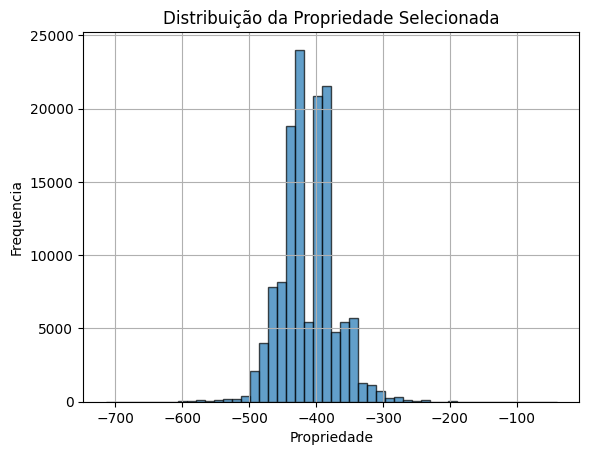

In [18]:
# Seleção da propriedade alvo
att_alvo = 10 # 15 propriedades [0-14]
Ys = Y[:,att_alvo].reshape(-1,1)
plt.hist(Y[:,att_alvo], bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Propriedade')
plt.ylabel('Frequencia')
plt.title('Distribuição da Propriedade Selecionada')
plt.grid(True)
plt.show()


In [19]:
# Normalização, Split, DataLoader
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xn = scaler.fit_transform(X)

In [20]:
class Data(Dataset):
    def __init__(self, data, targets):
        self.data = data
        self.targets = targets

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return torch.from_numpy(self.data[idx]).float(), torch.from_numpy(self.targets[idx]).float()

dataset = Data(Xn,Ys)

In [21]:
batch_size = 256

train_len = int(0.8 * len(dataset))
val_len = int(0.1 * len(dataset))
test_len = len(dataset) - train_len - val_len

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_len, val_len, test_len])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Rede Neural


## Modelo (Pytorch)

In [22]:
class MLP(nn.Module):
    def __init__(self, input_dim, output_dim, layers, lr=0.001):
        super(MLP, self).__init__()
        all_layers = []
        prev_dim = input_dim

        # Camadas ocultas
        for layer_dim in layers:
            all_layers.append(nn.Linear(prev_dim, layer_dim))
            all_layers.append(nn.ReLU())
            prev_dim = layer_dim

        # Camada de saída (ativação linear - regressão)
        all_layers.append(nn.Linear(prev_dim, output_dim))

        # Combinando as camadas
        self.layers = nn.Sequential(*all_layers)

        self.criterion = nn.L1Loss() #nn.MSELoss()
        self.optimizer = optim.Adam(self.parameters(), lr=lr)

    def forward(self, x):
        return self.layers(x)

    def train_model(self, dataloader):
        self.train()
        total_loss = 0
        for batch_x, batch_y in dataloader:
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)
            self.optimizer.zero_grad()
            outputs = self(batch_x)
            loss = self.criterion(outputs, batch_y)
            loss.backward()
            self.optimizer.step()
            total_loss += loss.item()
        return total_loss / len(dataloader)

    def validate_model(self, dataloader):
        self.eval()
        total_loss = 0
        with torch.no_grad():
            for batch_x, batch_y in dataloader:
                batch_x, batch_y = batch_x.to(device), batch_y.to(device)
                outputs = self(batch_x)
                loss = self.criterion(outputs, batch_y)
                total_loss += loss.item()
        return total_loss / len(dataloader)

    def test_model(self, dataloader):
        self.eval()
        predictions = []
        targets = []
        total_loss = 0
        with torch.no_grad():
            for batch_x, batch_y in dataloader:
                batch_x, batch_y = batch_x.to(device), batch_y.to(device)
                outputs = self(batch_x)
                loss = self.criterion(outputs, batch_y)
                total_loss += loss.item()
                predictions.extend(outputs.cpu().tolist())
                targets.extend(batch_y.cpu().tolist())
        return predictions, targets, total_loss / len(dataloader)

    def predict(self, dataloader):
        self.eval()
        predictions = []
        with torch.no_grad():
            for batch_x, _ in dataloader:
                batch_x = batch_x.to(device)
                outputs = self(batch_x)
                predictions.extend(outputs.cpu().tolist())
        return predictions

In [23]:
class EarlyStopping:
    def __init__(self, patience=5, verbose=False, delta=0):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
            verbose (bool): If True, prints a message for each validation loss improvement.
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = float('inf')
        self.delta = delta

    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.verbose:
                print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decreases.'''
        if self.verbose:
            print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), 'checkpoint.pt')
        self.val_loss_min = val_loss


## Otimizando os Hiperparâmetros

### Função Objetivo Optuna

In [ ]:
def objective(trial):
    early_stopping = EarlyStopping(patience=7, verbose=False)
    # lr = trial.suggest_float('lr', 1e-5, 1e-1, log=True)
    lr = 0.001
    n_layers = trial.suggest_int('n_layers', 1, 3)
    layers = []
    for i in range(n_layers):
        layers.append(trial.suggest_int(f'n_units_l{i+1}', 20, 400, 20))

    model = MLP(input_dim=X.shape[1], output_dim=1, layers=layers, lr=lr).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    for epoch in range(2000): # máximo épocas
        train_loss = model.train_model(train_loader)
        val_loss = model.validate_model(val_loader)
        early_stopping(val_loss, model)
        if early_stopping.early_stop:
            break
    return val_loss


### Otimização

**Cuidado:** O custo computacional pode ser elevado

In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

print('Número de tentativas: ', len(study.trials))
print('Melhor Resultado:')
trial = study.best_trial

print('MAE: ', trial.value)
print('Hiperparâmetros: ')
for key, value in trial.params.items():
    print(f'    {key}: {value}')


[I 2024-11-11 15:26:51,736] A new study created in memory with name: no-name-b96006d5-a47a-45ed-afa0-1b2522033efb
<ipython-input-35-1ab0a2b2131c>:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  layers.append(trial.suggest_int(f'n_units_l{i+1}', 20, 400, 20))
[W 2024-11-11 15:27:31,732] Trial 0 failed with parameters: {'n_layers': 3, 'n_units_l1': 180, 'n_units_l2': 300, 'n_units_l3': 320} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/optuna/study/_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-35-1ab0a2b2131c>", line 13, in objective
    train_loss = model.train_model(train_loader)
  File "<ipython-input-33-dc49a5dc08f9>", line 33, in train_model
    loss.backward()
  File "/usr/local/lib/python3.10/dist-packages/torch/_tensor.py", line 581, in backward
    torch.autograd

KeyboardInterrupt: 

## Treinamento

Época 10/1000, Train Loss: 5.9824, Validation Loss: 4.8716
Época 20/1000, Train Loss: 0.3074, Validation Loss: 0.2566
Época 30/1000, Train Loss: 0.1784, Validation Loss: 0.1579
Época 40/1000, Train Loss: 0.1616, Validation Loss: 0.2037
Época 50/1000, Train Loss: 0.1686, Validation Loss: 0.1415
Época 60/1000, Train Loss: 0.1529, Validation Loss: 0.1476
Época 70/1000, Train Loss: 0.1506, Validation Loss: 0.1817
Época 80/1000, Train Loss: 0.1595, Validation Loss: 0.1801
Early stopping


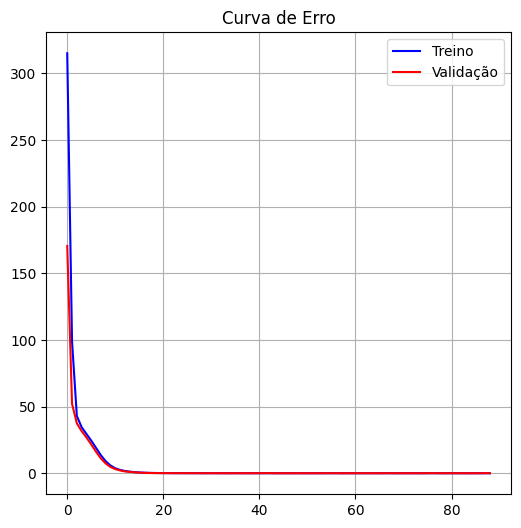

In [24]:
num_epochs = 1000
learning_rate = 0.001
# Definição do Modelo
model = MLP(input_dim=X.shape[1], output_dim=1, layers=[180], lr=learning_rate).to(device)

# Early Stop
early_stopping = EarlyStopping(patience=20, verbose=False)

tloss = []
vloss = []
for epoch in range(num_epochs):
    train_loss = model.train_model(train_loader)
    val_loss = model.validate_model(val_loader)
    tloss.append(train_loss)
    vloss.append(val_loss)
    if (epoch+1) % 10 == 0:
        print(f"Época {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")
    early_stopping(val_loss, model)
    if early_stopping.early_stop:
        print("Early stopping")
        break

fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title("Curva de Erro")
ax.plot(tloss,'blue', label='Treino')
ax.plot(vloss,'red', label='Validação')
ax.legend()
ax.grid(True)
plt.show()


Erro de predição (MAE) no conjunto de teste: 0.16872362736261115


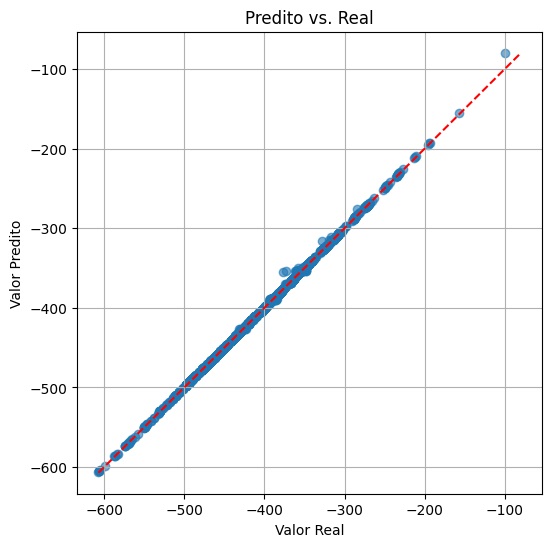

In [25]:
Yp, Yt, loss_test = model.test_model(test_loader)

plt.figure(figsize=(6, 6))
plt.scatter(Yp, Yt, alpha=0.6)

max_val = max(max(Yt), max(Yp))
min_val = min(min(Yt), min(Yp))
plt.plot([min_val, max_val], [min_val, max_val], 'r', linestyle='--')

plt.xlabel('Valor Real')
plt.ylabel('Valor Predito')
plt.title('Predito vs. Real')
plt.grid(True)

print(f"Erro de predição (MAE) no conjunto de teste: {loss_test}")

plt.show()



In [26]:
import importlib
import chemXAI  # Importa o módulo inicialmente

# ... faça algumas modificações no arquivo do seu_modulo ...

importlib.reload(chemXAI)  # Recarrega o módulo com as modificações

<module 'chemXAI' from '/content/chemXAI.py'>

# Explicação com Shap

In [27]:
from chemXAI import Shap

In [28]:
# Inicializa a classe Shap com o modelo e DataLoaders
shap_explainer = Shap(model, train_loader, test_loader, device)

# Gera e exibe uma explicação local para a primeira instância no batch de teste
local_explanation = shap_explainer.local_explanation(0)

# Gera e exibe a explicação global
all_local_importances, global_explanation = shap_explainer.global_explanation()

Background shape: (256, 29)
Test data shape: (256, 29)


  0%|          | 0/256 [00:00<?, ?it/s]

Global SHAP values shape: (29,)


In [29]:
print(local_explanation)

    Feature Index  SHAP Value
0               0    7.707330
1               3    3.531975
2               2    1.765019
3               4    1.467247
4               7    1.081693
5               6    0.331279
6               8    0.164486
7              12    0.116775
8              13    0.110089
9              10    0.074158
10             11    0.043493
11             17    0.030283
12             23    0.019592
13              9    0.012755
14             25    0.007436
15             21    0.002116
16             26    0.001059
17             28    0.000000
18             27    0.000000
19             16   -0.001478
20             19   -0.002211
21             22   -0.006745
22             20   -0.006880
23             24   -0.012288
24             18   -0.016433
25             15   -0.039307
26             14   -0.141796
27              5   -0.739736
28              1   -5.739050


In [30]:
print(global_explanation)

   Feature  Importance
0        0   11.073518
1        1    8.052231
2        2    6.982321
3        3    4.712602
4        4    3.023176
5        5    2.486399
6        6    2.149870
7        8    2.137016
8        7    1.870223
9       12    0.308604
10      11    0.253795
11      13    0.178212
12      14    0.136105
13      10    0.082737
14      16    0.079513
15      15    0.061357
16      18    0.054222
17      17    0.052921
18      23    0.047307
19      24    0.045661
20      20    0.028656
21       9    0.028400
22      21    0.027825
23      22    0.026679
24      19    0.015610
25      25    0.014227
26      26    0.005826
27      27    0.000000
28      28    0.000000


In [31]:
print(all_local_importances)

     Feature 0  Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  \
0     7.707330  -5.739050   1.765019   3.531975   1.467247  -0.739736   
1    11.226393  -9.603965   7.407649   1.713836  -0.177347   0.337496   
2     5.930258  -7.307948 -11.400388   7.797527   1.921438  -1.662127   
3    29.505404  -6.540166  14.817062   8.086632   6.658718   5.115616   
4   -10.081294   3.742382 -11.080944  -3.761836  -1.475466  -0.907186   
..         ...        ...        ...        ...        ...        ...   
251 -11.228875  -9.862425 -11.279112  -0.314419  -0.793192  -6.817760   
252   8.718973   2.128465 -12.068324 -11.676873  -2.177965   5.169195   
253   6.241817  10.190355   7.921921   3.509831  -0.284753  -0.661527   
254 -19.364682   2.329292  -4.801492   0.435183   0.022547  -2.034377   
255   1.172008  -0.165411   8.849853   6.745065  -0.693443  -6.996583   

     Feature 6  Feature 7  Feature 8  Feature 9  ...  Feature 19  Feature 20  \
0     0.331279   1.081693   0.164486   0.01

# Explicação com LIME

In [32]:
from chemXAI import LIME

In [33]:
# Instancia a explicação
lime_explainer = LIME(model, train_loader, test_loader, device, mode='regression')

# Gera e exibe uma explicação local para a primeira instância no batch de teste
local_explanation = lime_explainer.local_explanation(0)

Intercept -424.8364895502405
Prediction_local [-402.5528679]
Right: -401.87256


In [34]:
local_explanation

,Feature,LIME Value
0,-0.51 < Feature 0 <= 0.10,5.886387
2,-0.70 < Feature 2 <= 0.05,4.577881
3,-0.66 < Feature 3 <= -0.10,2.959365
4,Feature 22 <= 0.10,2.612128
5,-0.58 < Feature 4 <= 0.04,2.574023
6,Feature 20 <= 0.11,2.521983
7,Feature 24 <= 0.02,2.510466
9,-0.63 < Feature 7 <= 0.06,1.852916
10,-0.62 < Feature 6 <= 0.04,1.609077
11,Feature 10 <= -0.54,1.395623


# Experimentos (Sugestões)






1. Verificar o modelo para os outros descritores
2. Verificar por que os valores de shapley e os valores do LIME mostram diferentes tipos de explicação
